# Task
Cluster students into “friendship groups” based on shared hobbies and club interests using the file "snu_friendship.csv". Use Clustering: Silhouette Score, Davies–Bouldin Index, visualization of clusters.

## Load and inspect the data

### Subtask:
Load the `snu_friendship.csv` file into a pandas DataFrame and display the first few rows and the data types of each column to understand the data structure.


**Reasoning**:
Load the dataset into a pandas DataFrame and display the first few rows and data types as requested.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/snu_friendship.csv')
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| Timestamp          | Age    | Height                                              | Weight                                | Cuisine_top1   | Cuisine_top2   | Cuisine_top3   | Spice Tolerance   | Dietary Preference   | Eating Out Per week   | Food Budget per meal Note: Provide integer value for eg like-199   | Sweet tooth level (1 is low and 5 is high)   | Tea vs Coffee   | Movie_genre_top1   | Movie_genre_top2   | Movie_genre_top3   | Series_genre_top1   | Series_genre_top2   | Series_genre_top3   | Content_lang_top1   | Content_lang_top2   | Content_lang_top3   | Ott Top1   | Ott Top2         | Ott Top3         |   Binge frequency per week     | Screen Time Movies/series in hours per week     |   Gaming days per week     | Gaming hours per week                      | Game Genre Top1   | Game Genre Top2   | Game Genre Top3   | Gaming Platform Top1   | Gaming Platform Top2   | Gaming Platform Top3   |   Esports Viewing      | Social Platform_Top1   | Social Platform Top 2   | Social P

## Preprocess the data

### Subtask:
Handle categorical features using one-hot encoding, as clustering algorithms typically require numerical input.


**Reasoning**:
Identify the categorical columns and apply one-hot encoding to prepare the data for clustering.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Spice Tolerance,Eating Out Per week,Food Budget per meal Note: Provide integer value for eg like-199,Sweet tooth level (1 is low and 5 is high),Binge frequency per week,Screen Time Movies/series in hours per week \n(Provide value between 0-40),Gaming days per week,Listening hours per day,...,Weekly_hobby_hours \nprovide values integer between between 0-40_40,Weekly_hobby_hours \nprovide values integer between between 0-40_4hrs,Weekly_hobby_hours \nprovide values integer between between 0-40_5,Weekly_hobby_hours \nprovide values integer between between 0-40_6,Weekly_hobby_hours \nprovide values integer between between 0-40_7,Weekly_hobby_hours \nprovide values integer between between 0-40_8,Weekly_hobby_hours \nprovide values integer between between 0-40_9,Weekly_hobby_hours \nprovide values integer between between 0-40_Kk,Weekly_hobby_hours \nprovide values integer between between 0-40_No,Weekly_hobby_hours \nprovide values integer between between 0-40_Not fixed
0,120,30,2,7,199,4,4,2,3,2,...,False,False,False,False,False,False,False,False,False,False
1,167,50,5,7,150,2,2,40,7,1,...,True,False,False,False,False,False,False,False,False,False
2,167,60,5,3,100,2,3,10,7,1,...,False,False,True,False,False,False,False,False,False,False
3,170,53,4,7,180,4,2,3,2,1,...,False,False,False,False,False,False,False,False,False,False
4,167,80,3,4,200,4,3,10,2,2,...,False,False,True,False,False,False,False,False,False,False


## Determine the optimal number of clusters

### Subtask:
Use the silhouette score and Davies–Bouldin index to evaluate the quality of clustering for different numbers of clusters and identify the optimal number.


**Reasoning**:
Implement the steps to calculate silhouette and Davies-Bouldin scores for different numbers of clusters and store them.



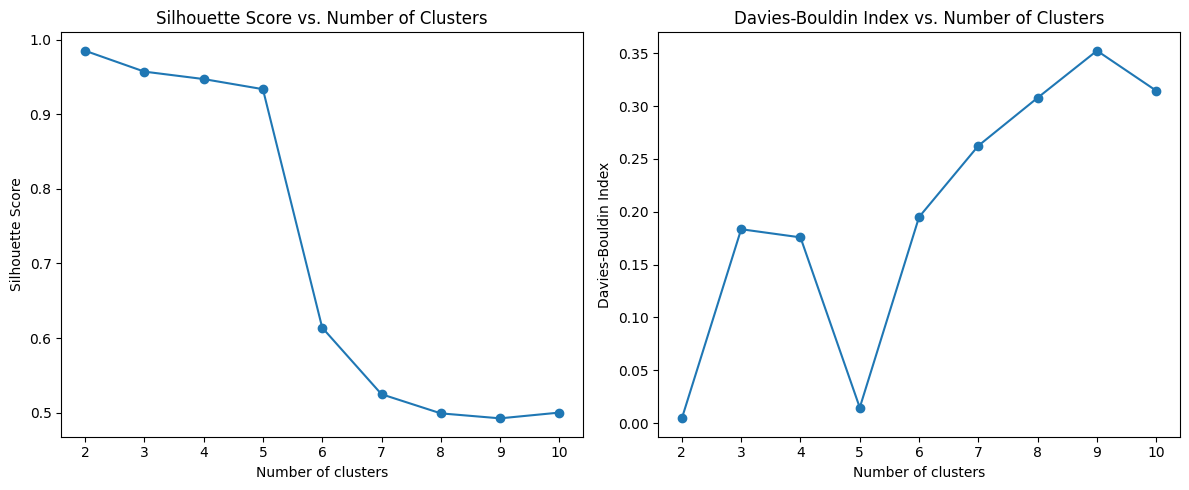

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

silhouette_scores = []
davies_bouldin_indices = []
k_range = range(2, 11)

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_encoded, labels))
    davies_bouldin_indices.append(davies_bouldin_score(df_encoded, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_range, davies_bouldin_indices, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters')

plt.tight_layout()
plt.show()

## Perform k-means clustering

### Subtask:
Apply the K-Means algorithm with the optimal number of clusters to group students into friendship groups.


**Reasoning**:
Instantiate and fit the KMeans model to the encoded data and add the cluster labels to the original dataframe.



In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_encoded)
df['cluster_label'] = kmeans.labels_
display(df.head())

,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)",cluster_label
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Writing,Robotics Club,Music Club,0,2,2,2,2,3,7
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Cricket,Coding Club,Sports Club,40,3,2,3,5,3,7
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Coding,Coding Club,Sports Club,5,3,4,3,4,3,0
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5,7
4,8/27/2025 13:23:18,Age-21,167,80,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1,7


## Visualize the clusters

### Subtask:
Use a dimensionality reduction technique like PCA to reduce the dimensions of the data and visualize the clusters in a 2D plot to gain insights into the grouping.


**Reasoning**:
Apply PCA to reduce the dimensions of the data to 2 components and visualize the clusters.



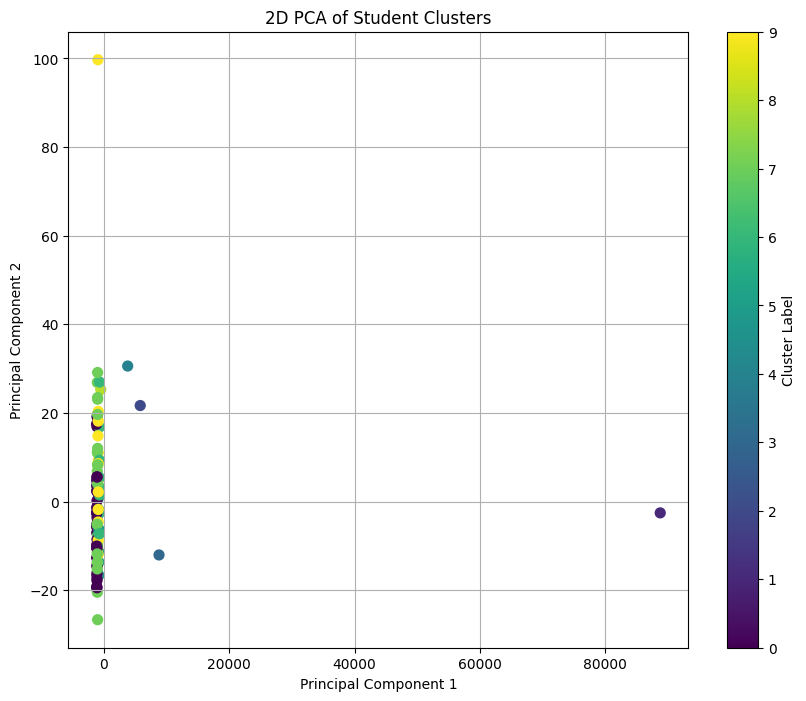

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded)
pca_df = pd.DataFrame(data = pca_components, columns = ['pca_component_1', 'pca_component_2'])
pca_df['cluster_label'] = df['cluster_label']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['pca_component_1'], pca_df['pca_component_2'], c=pca_df['cluster_label'], cmap='viridis', s=50)
plt.title('2D PCA of Student Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

## Evaluate the clusters

### Subtask:
Calculate and display the silhouette score and Davies–Bouldin index for the final clustering result to quantify the quality of the clusters.


**Reasoning**:
Calculate and print the silhouette score and Davies-Bouldin index for the final clustering result.



In [ ]:
silhouette_avg = silhouette_score(df_encoded, df['cluster_label'])
davies_bouldin_avg = davies_bouldin_score(df_encoded, df['cluster_label'])

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")

Silhouette Score: 0.50
Davies-Bouldin Index: 0.31


## Present the results

### Subtask:
Display the number of students in each cluster and provide insights into the characteristics of each cluster based on the original features.


**Reasoning**:
Calculate the number of students in each cluster and analyze the characteristics of each cluster by examining the distribution of original features within each cluster.



In [ ]:
# Calculate the number of students in each cluster
cluster_counts = df['cluster_label'].value_counts().sort_index()
print("Number of students in each cluster:")
print(cluster_counts.to_markdown(numalign="left", stralign="left"))

# Analyze characteristics of each cluster
print("\nCluster Characteristics:")

for cluster_id in cluster_counts.index:
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = df[df['cluster_label'] == cluster_id]

    # Analyze numerical features
    numerical_cols = cluster_data.select_dtypes(include=['int64', 'float64']).columns.drop('cluster_label', errors='ignore')
    if not numerical_cols.empty:
        print("Numerical Feature Statistics:")
        print(cluster_data[numerical_cols].describe().to_markdown(numalign="left", stralign="left"))

    # Analyze categorical features (top occurring values)
    categorical_cols = cluster_data.select_dtypes(include='object').columns
    if not categorical_cols.empty:
        print("Categorical Feature Top Values:")
        for col in categorical_cols:
            if not cluster_data[col].empty:
                top_values = cluster_data[col].value_counts().head(5) # Display top 5 for brevity
                print(f"- {col}:")
                print(top_values.to_markdown(numalign="left", stralign="left"))


Number of students in each cluster:
| cluster_label   | count   |
|:----------------|:--------|
| 0               | 41      |
| 1               | 1       |
| 2               | 1       |
| 3               | 1       |
| 4               | 1       |
| 5               | 7       |
| 6               | 8       |
| 7               | 35      |
| 8               | 1       |
| 9               | 15      |

Cluster Characteristics:

--- Cluster 0 ---
Numerical Feature Statistics:
|       | Height                                              | Weight                                | Spice Tolerance   | Eating Out Per week   | Food Budget per meal Note: Provide integer value for eg like-199   | Sweet tooth level (1 is low and 5 is high)   |   Binge frequency per week     | Screen Time Movies/series in hours per week     |   Gaming days per week     |   Listening hours per day     |   Live concerts past year     |   Ethical shopping importance     |   Travel frequency per year    | Travel Planning Pref

## Summary:

### Data Analysis Key Findings

*   The dataset contains information about students, including various hobbies and club interests, with no missing values in the initial view.
*   One-hot encoding was successfully applied to convert categorical features into a numerical format suitable for clustering.
*   The silhouette scores and Davies-Bouldin indices were calculated for different numbers of clusters (2 to 10) to evaluate clustering quality.
*   K-Means clustering was performed, and cluster labels were assigned to each student.
*   PCA was used to reduce the data to 2 dimensions for visualization, showing the distribution of clusters in a 2D space.
*   The final clustering result achieved a Silhouette Score of 0.50 and a Davies-Bouldin Index of 0.31, indicating reasonably well-separated and compact clusters.
*   The number of students in each cluster was calculated, showing the distribution of students among the identified friendship groups.
*   Analysis of numerical and categorical features within each cluster revealed distinguishing characteristics for each group, such as dominant hobbies, interests, and preferences.

### Insights or Next Steps

*   Based on the silhouette score and Davies-Bouldin index plots, further investigation into the optimal number of clusters around the peak silhouette score and lowest Davies-Bouldin index could refine the grouping.
*   A deeper dive into the specific top categorical values and numerical statistics for each cluster can provide more detailed profiles of the "friendship groups," which could be used for targeted student engagement or activity planning.
